In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron, LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans


In [60]:
# Load the dataset (replace this with your dataset)
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [61]:
# 1. Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2

In [62]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [63]:
# 2. Display information about the dataset
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FA

In [64]:
# 3. Display summary statistics
print("\nSummary statistics of the dataset:")
data.describe()



Summary statistics of the dataset:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [65]:
# 4. Check for null values
print("\nChecking for null values in the dataset:")
print(data.isnull().sum())



Checking for null values in the dataset:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [66]:
# 5. Display the shape of the dataset
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(2111, 17)


In [67]:
# 6. Display column names
print("\nColumn names:")
print(data.columns)


Column names:
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [68]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

EDA


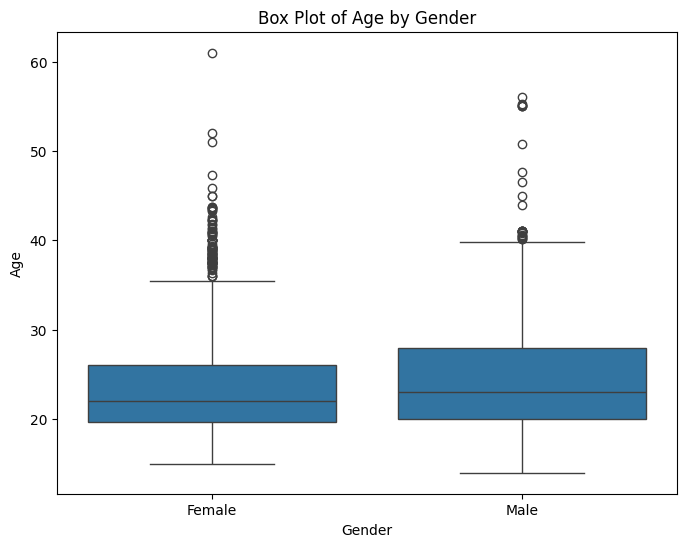

In [69]:
# Box plot of 'Age' by 'Gender'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=data)
plt.title('Box Plot of Age by Gender')
plt.show()


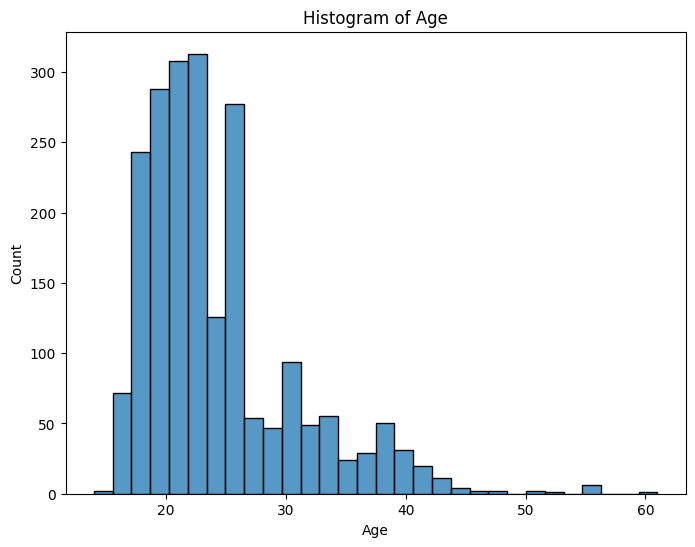

In [70]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30)
plt.title('Histogram of Age')
plt.show()

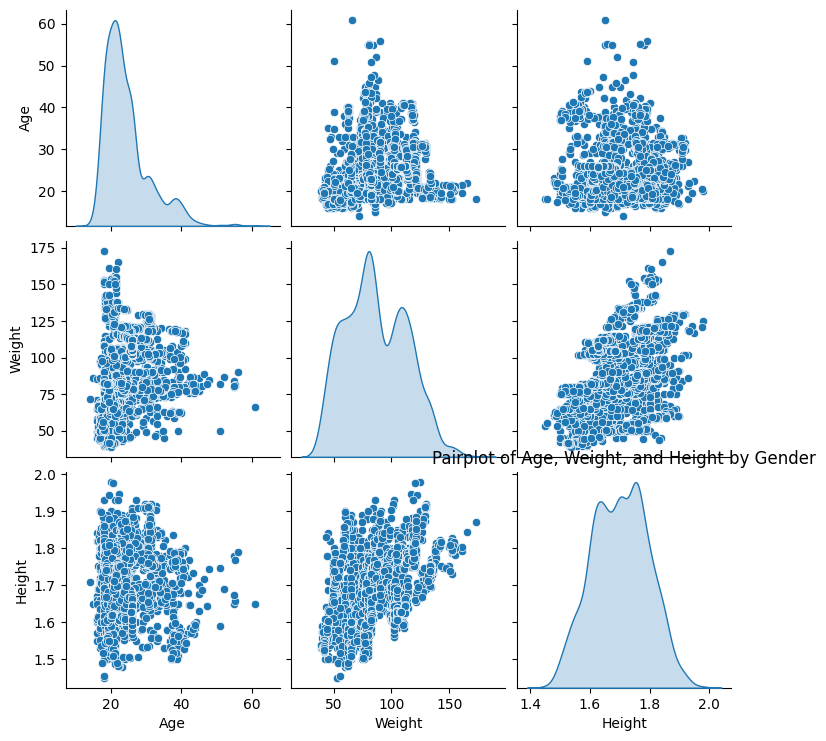

In [71]:
sns.pairplot(data[['Age', 'Weight', 'Height']], diag_kind='kde')
plt.title('Pairplot of Age, Weight, and Height by Gender')
plt.show()


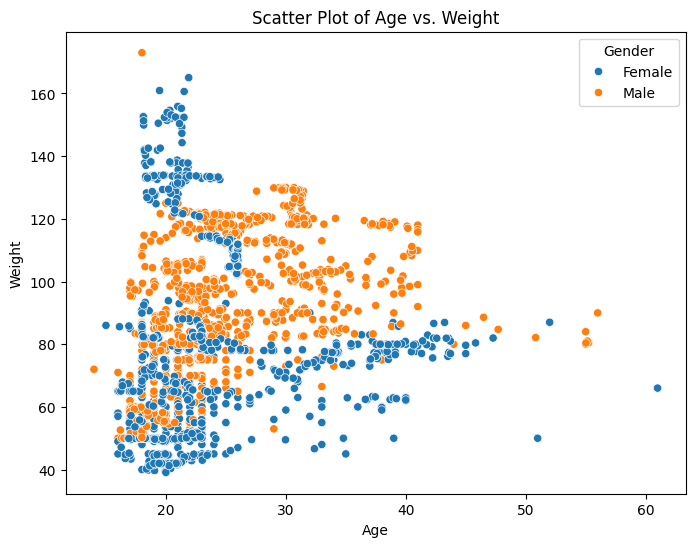

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Weight', data=data, hue='Gender')
plt.title('Scatter Plot of Age vs. Weight')
plt.show()


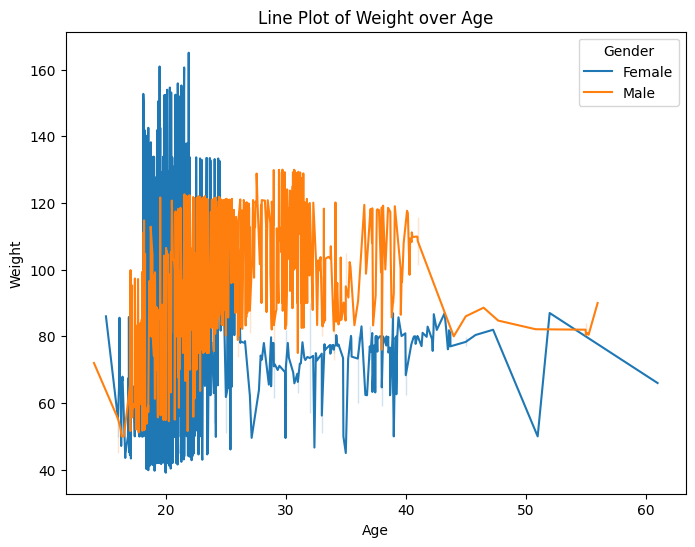

In [73]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='Weight', data=data, hue='Gender')
plt.title('Line Plot of Weight over Age')
plt.show()


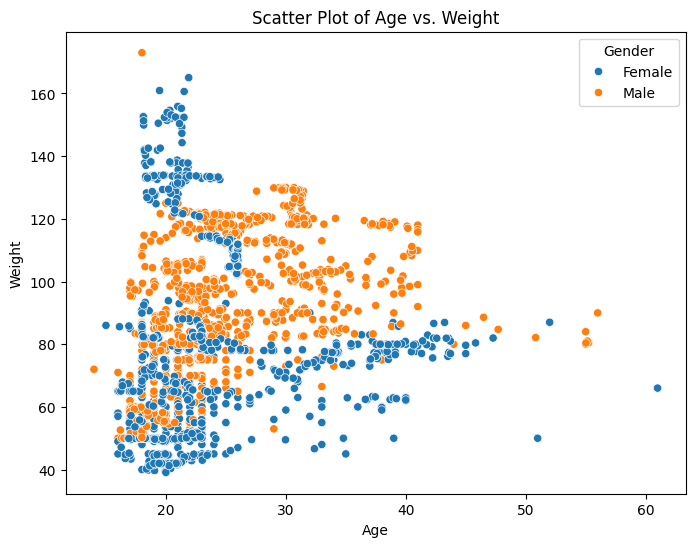

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Weight', data=data, hue='Gender')
plt.title('Scatter Plot of Age vs. Weight')
plt.show()


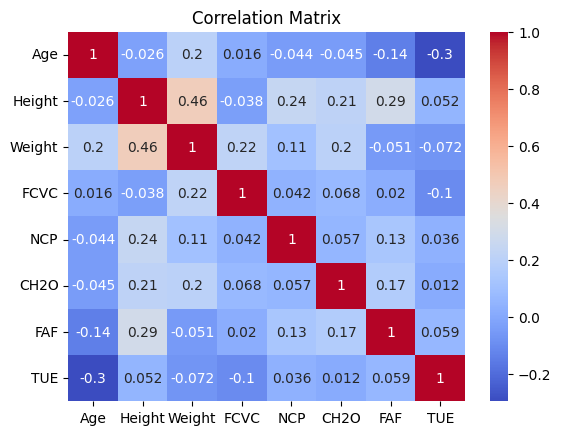

In [75]:
# Compute the correlation matrix
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numerical_cols].corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [76]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [77]:
# Handle missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])


In [78]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [80]:
from sklearn.preprocessing import LabelEncoder

# Define the target column
target = 'NObeyesdad'  # Adjust the target variable name accordingly

# Separate features and target
X = data.drop(columns=[target])
y = data[target]

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Handle missing values for categorical columns using SimpleImputer
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

# Apply Label Encoder to categorical features
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])


In [82]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [83]:
data = pd.concat([pd.DataFrame(X), pd.DataFrame(data[target])], axis=1)


In [84]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,Obesity_Type_III


In [85]:
# Display basic information about the dataset
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Check types of each column
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [86]:
# Separate features and target
X = data.drop(columns=[target])
y = data[target]


In [87]:
# Standardize the numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [96]:
# Feature Selection
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)


In [97]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)


In [98]:
# K-Fold cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_index, test_index = next(kf.split(X_selected))


In [99]:
# Splitting data for non-PCA
X_train, X_test = X_selected[train_index], X_selected[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [101]:
# Splitting data for PCA
X_train_pca, X_test_pca = X_pca[train_index], X_pca[test_index]

MODEL BUILDING

In [107]:
from sklearn.preprocessing import label_binarize
# Label binarization for multi-class ROC plotting
classes = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
           'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
           'Obesity_Type_III']
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

# Function for plotting ROC Curves
def plot_roc_curve(y_test_bin, y_score, title):
    fpr = {}
    tpr = {}
    roc_auc = {}
    plt.figure()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {title}')
    plt.legend(loc="lower right", fontsize='small')
    plt.show()



SVM Metrics without PCA:
Accuracy: 0.7470
Precision: 0.7440
Recall: 0.7470
F1 Score: 0.7394


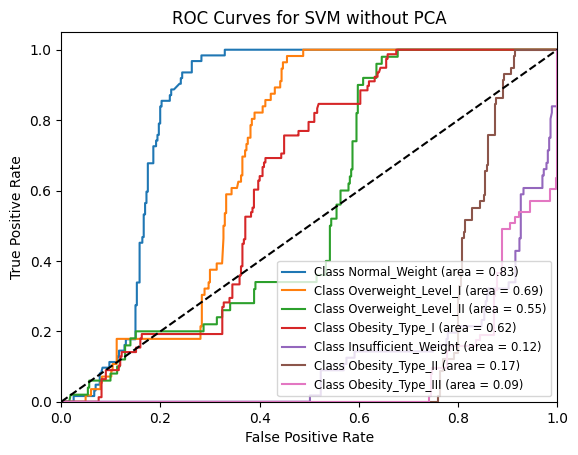

In [108]:
# SVM Model Training without PCA
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

y_test_bin = y_bin[test_index]  # Binarized labels for testing
y_score = svm_model.decision_function(X_test)  # Get decision function for all classes

print("SVM Metrics without PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted"):.4f}')
plot_roc_curve(y_test_bin, y_score, 'SVM without PCA')

SVM Metrics with PCA:
Accuracy: 0.6548
Precision: 0.6812
Recall: 0.6548
F1 Score: 0.6499


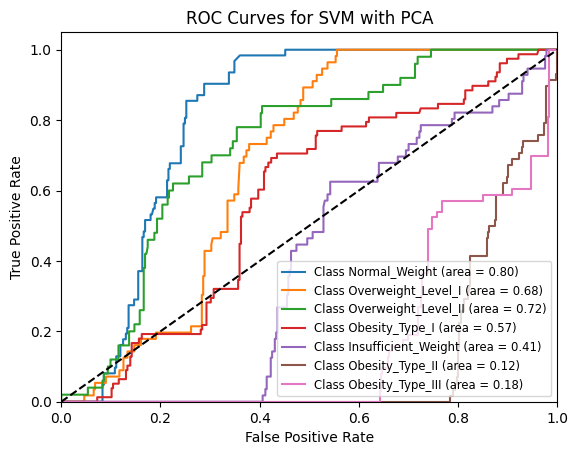

In [123]:
# SVM Model Training with PCA
svm_model_pca = SVC(probability=True)
svm_model_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_model_pca.predict(X_test_pca)


y_test_bin = y_bin[test_index]  # Binarized labels for testing
y_score_pca = svm_model_pca.decision_function(X_test_pca)  # Get decision function for all classes

print("SVM Metrics with PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_pca):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_pca, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_pca, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_pca, average="weighted"):.4f}')
plot_roc_curve(y_test_bin, y_score_pca, 'SVM with PCA')

Naive Bayes Metrics without PCA:
Accuracy: 0.6170
Precision: 0.5959
Recall: 0.6170
F1 Score: 0.5923


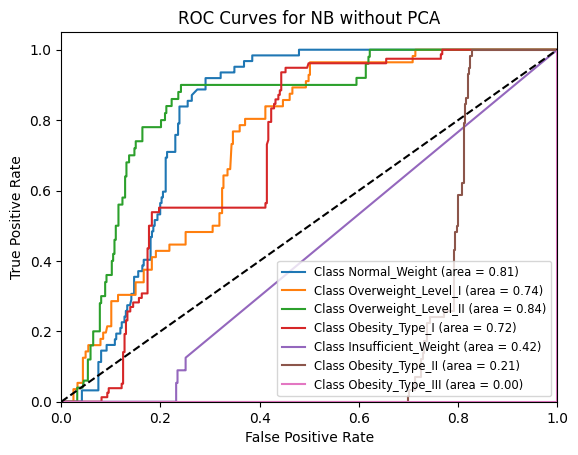

In [125]:
# For example, Naive Bayes without PCA:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

y_test_bin = y_bin[test_index]  # Binarized labels for testing
y_score = nb_model.predict_proba(X_test)  # Get decision function for all classes
print("Naive Bayes Metrics without PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_nb, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_nb, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_nb, average="weighted"):.4f}')
plot_roc_curve(y_test_bin, y_score, 'NB without PCA')



Naive Bayes Metrics with PCA:
Accuracy: 0.5319
Precision: 0.5258
Recall: 0.5319
F1 Score: 0.5243


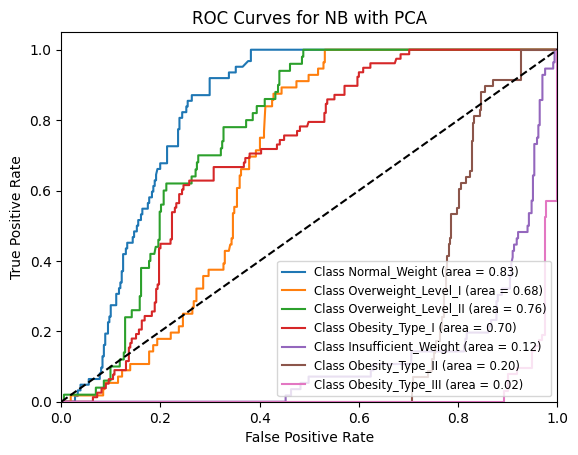

In [127]:
# Naive Bayes with PCA:
nb_model_pca = GaussianNB()
nb_model_pca.fit(X_train_pca, y_train)
y_pred_nb_pca = nb_model_pca.predict(X_test_pca)

y_test_bin = y_bin[test_index]  # Binarized labels for testing
y_score_pca = nb_model_pca.predict_proba(X_test_pca)  # Get decision function for all classes

print("Naive Bayes Metrics with PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb_pca):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_nb_pca, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_nb_pca, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_nb_pca, average="weighted"):.4f}')
plot_roc_curve(y_test_bin, y_score_pca, 'NB with PCA')

In [113]:
# Decision Tree Classifier without PCA
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Metrics without PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_dt, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_dt, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_dt, average="weighted"):.4f}')

Decision Tree Metrics without PCA:
Accuracy: 0.8180
Precision: 0.8221
Recall: 0.8180
F1 Score: 0.8186


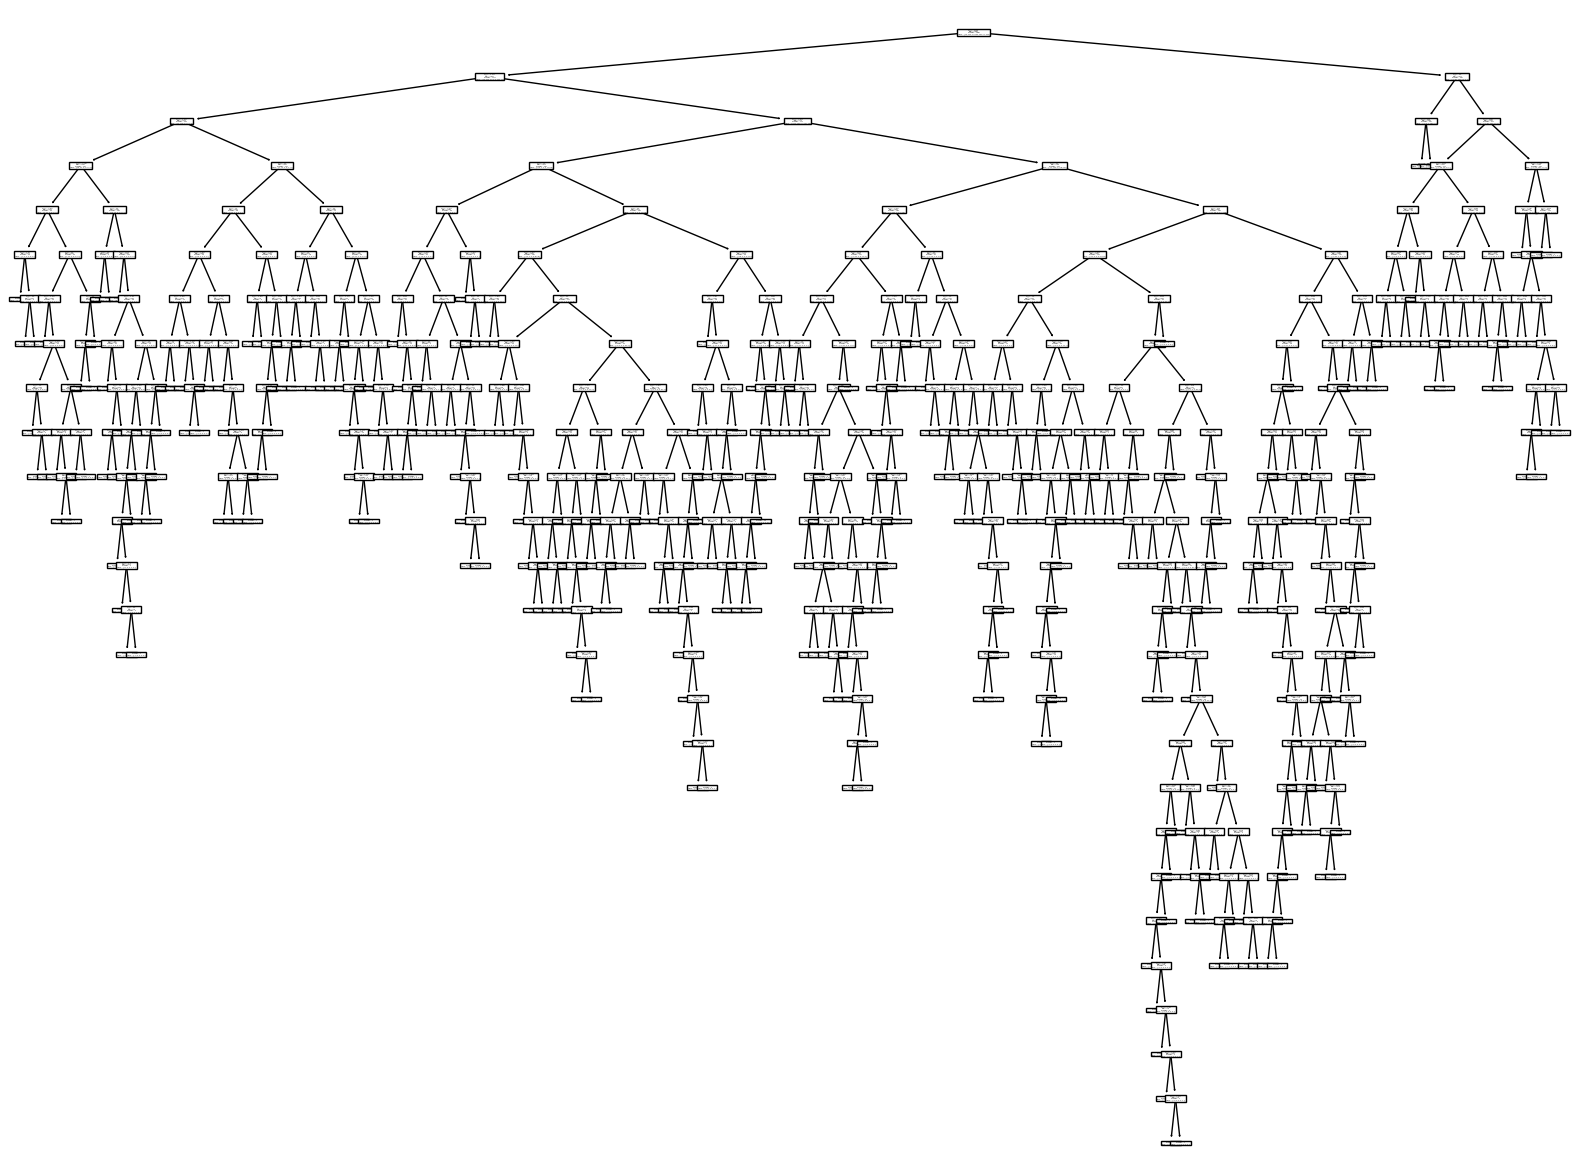

In [131]:
fig = plt.figure(figsize=(20,15))
tree.plot_tree(dt_model);

In [114]:
# Decision Tree Classifier with PCA
dt_model_pca = DecisionTreeClassifier()
dt_model_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_model_pca.predict(X_test_pca)
print("Decision Tree Metrics with PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt_pca):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_dt_pca, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_dt_pca, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_dt_pca, average="weighted"):.4f}')

Decision Tree Metrics with PCA:
Accuracy: 0.7494
Precision: 0.7479
Recall: 0.7494
F1 Score: 0.7476


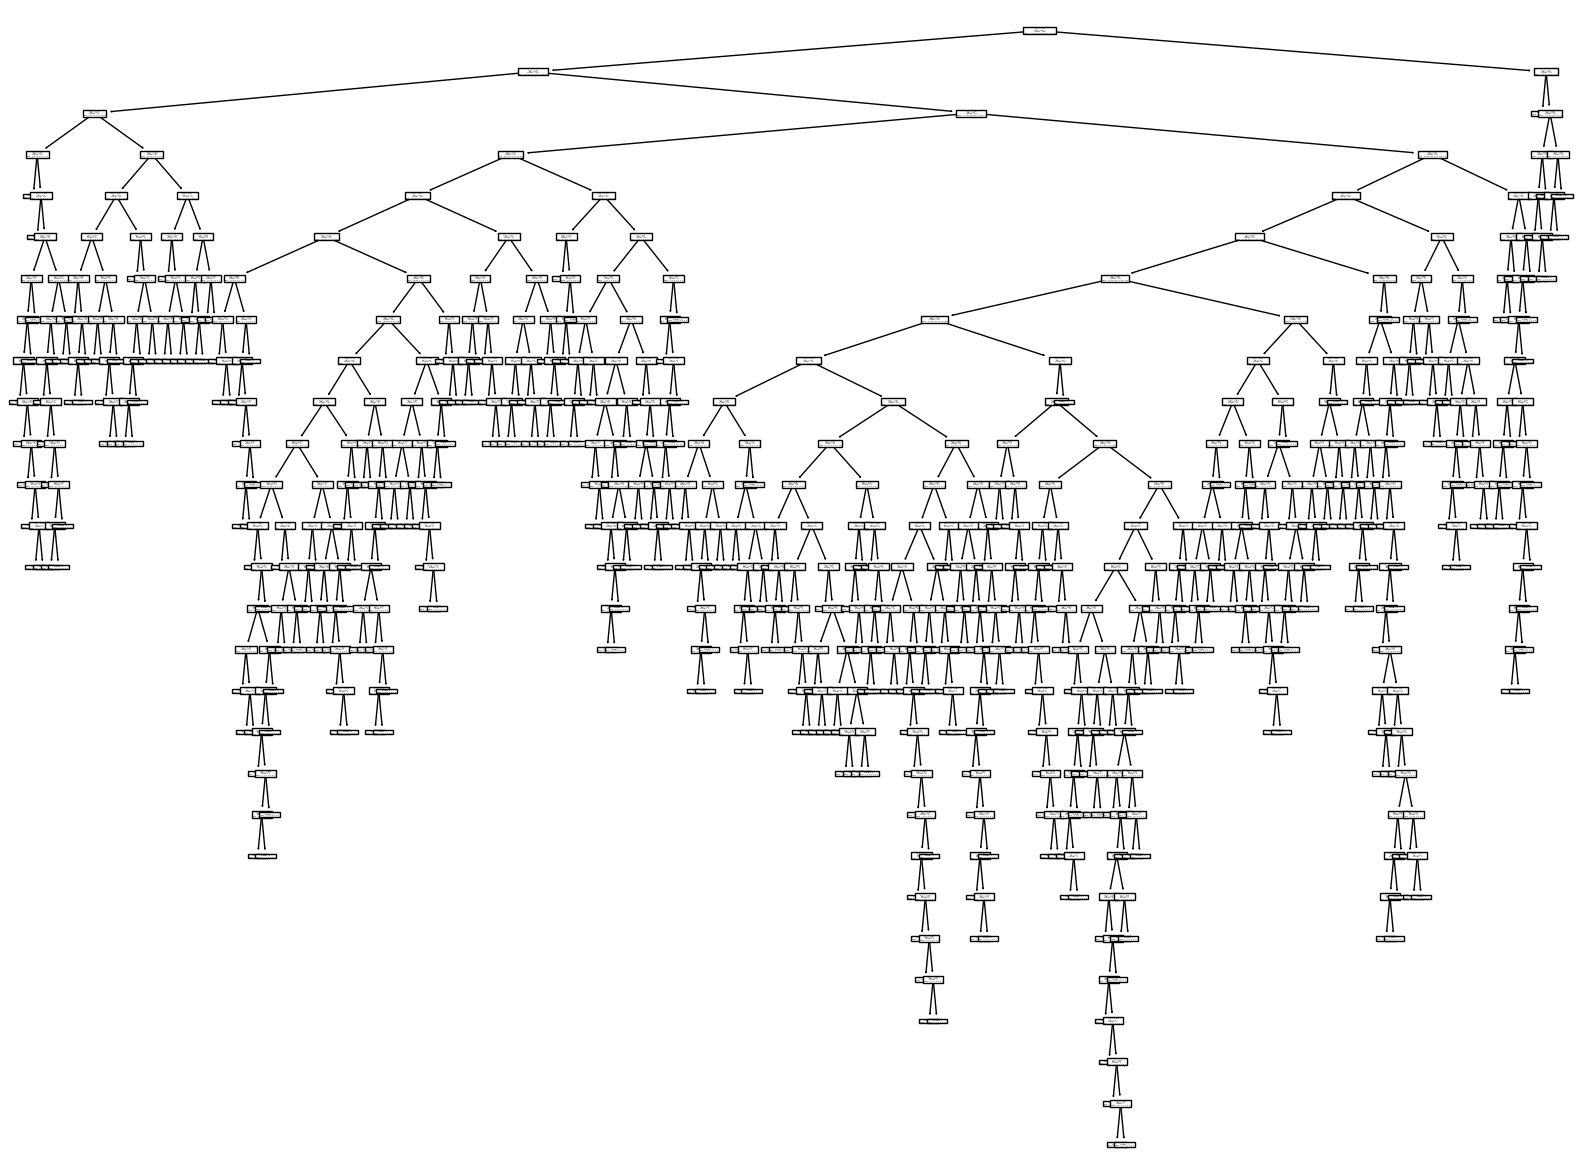

In [132]:
fig = plt.figure(figsize=(20,15))
tree.plot_tree(dt_model_pca);

In [115]:
# Random Forest Classifier without PCA
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Metrics without PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_rf, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_rf, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf, average="weighted"):.4f}')

Random Forest Metrics without PCA:
Accuracy: 0.8061
Precision: 0.8107
Recall: 0.8061
F1 Score: 0.8069


In [116]:
# Random Forest Classifier with PCA
rf_model_pca = RandomForestClassifier()
rf_model_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)
print("Random Forest Metrics with PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf_pca):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_rf_pca, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_rf_pca, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf_pca, average="weighted"):.4f}')


Random Forest Metrics with PCA:
Accuracy: 0.7447
Precision: 0.7398
Recall: 0.7447
F1 Score: 0.7409


In [117]:
# Perceptron without PCA
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
y_pred_perceptron = perceptron_model.predict(X_test)
print("Perceptron Metrics without PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_perceptron):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_perceptron, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_perceptron, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_perceptron, average="weighted"):.4f}')


Perceptron Metrics without PCA:
Accuracy: 0.5012
Precision: 0.5323
Recall: 0.5012
F1 Score: 0.4498


In [118]:
# Perceptron with PCA
perceptron_model_pca = Perceptron()
perceptron_model_pca.fit(X_train_pca, y_train)
y_pred_perceptron_pca = perceptron_model_pca.predict(X_test_pca)

print("Perceptron Metrics with PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_perceptron_pca):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_perceptron_pca, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_perceptron_pca, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_perceptron_pca, average="weighted"):.4f}')


Perceptron Metrics with PCA:
Accuracy: 0.4752
Precision: 0.3400
Recall: 0.4752
F1 Score: 0.3823


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
# MLP Classifier without PCA
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print("MLP Metrics without PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_mlp, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_mlp, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_mlp, average="weighted"):.4f}')

MLP Metrics without PCA:
Accuracy: 0.7778
Precision: 0.7759
Recall: 0.7778
F1 Score: 0.7750


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [120]:
#MLP Classifier with PCA
mlp_model_pca = MLPClassifier(random_state=42)
mlp_model_pca.fit(X_train_pca, y_train)
y_pred_mlp_pca = mlp_model_pca.predict(X_test_pca)
print("MLP Metrics with PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_mlp_pca):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_mlp_pca, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_mlp_pca, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_mlp_pca, average="weighted"):.4f}')

MLP Metrics with PCA:
Accuracy: 0.6501
Precision: 0.6556
Recall: 0.6501
F1 Score: 0.6471


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [121]:
# Logistic Regression without PCA
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Metrics without PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_logistic, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_logistic, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_logistic, average="weighted"):.4f}')


Logistic Regression Metrics without PCA:
Accuracy: 0.7494
Precision: 0.7494
Recall: 0.7494
F1 Score: 0.7409


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
# Logistic Regression with PCA
logistic_model_pca = LogisticRegression()
logistic_model_pca.fit(X_train_pca, y_train)
y_pred_logistic_pca = logistic_model_pca.predict(X_test_pca)
print("Logistic Regression Metrics with PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_logistic_pca):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_logistic_pca, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_logistic_pca, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_logistic_pca, average="weighted"):.4f}')


Logistic Regression Metrics with PCA:
Accuracy: 0.5839
Precision: 0.5669
Recall: 0.5839
F1 Score: 0.5717


AdaBoost Metrics without PCA:
Accuracy: 0.4184
Precision: 0.3418
Recall: 0.4184
F1 Score: 0.3151


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


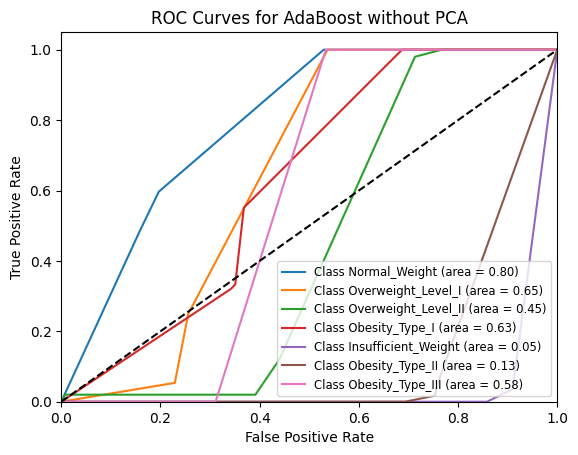

In [129]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

#AdaBoost without PCA
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
y_score_ada = ada_model.decision_function(X_test)  # AdaBoost may require .predict_proba depending on sklearn version
print("AdaBoost Metrics without PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_ada, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_ada, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_ada, average="weighted"):.4f}')
plot_roc_curve(y_test_bin, y_score_ada, 'AdaBoost without PCA')

Bagging Metrics without PCA:
Accuracy: 0.8251
Precision: 0.8262
Recall: 0.8251
F1 Score: 0.8250


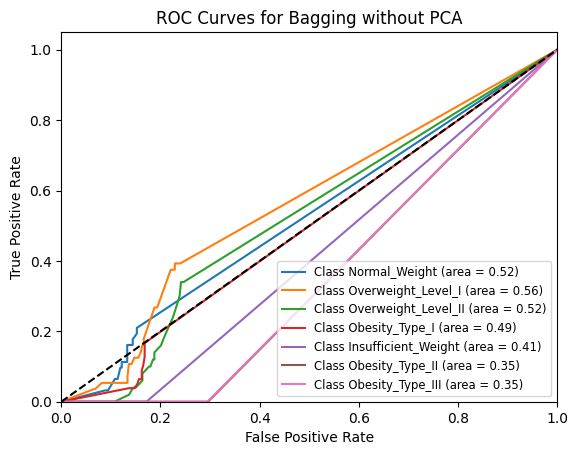

In [135]:
# Bagging without PCA
bagging_model = BaggingClassifier()
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
y_score_bagging = bagging_model.predict_proba(X_test)

print("Bagging Metrics without PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_bagging):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_bagging, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_bagging, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_bagging, average="weighted"):.4f}')
plot_roc_curve(y_test_bin, y_score_bagging, 'Bagging without PCA')


KNN Metrics without PCA:
Accuracy: 0.7943
Precision: 0.8001
Recall: 0.7943
F1 Score: 0.7944


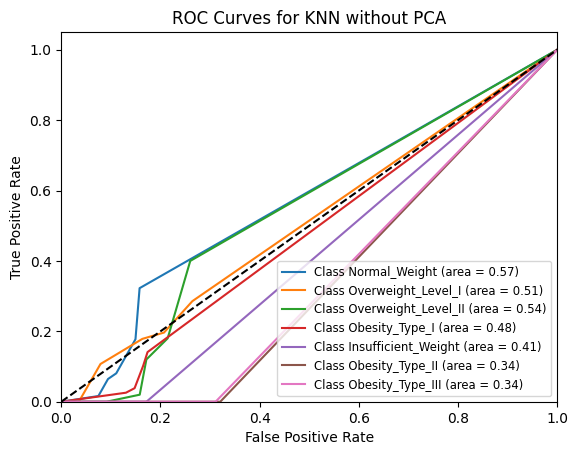

In [136]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model Training without PCA
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)

print("KNN Metrics without PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_knn, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_knn, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_knn, average="weighted"):.4f}')

plot_roc_curve(y_test_bin, y_proba_knn, 'KNN without PCA')

KNN Metrics with PCA:
Accuracy: 0.7447
Precision: 0.7427
Recall: 0.7447
F1 Score: 0.7417


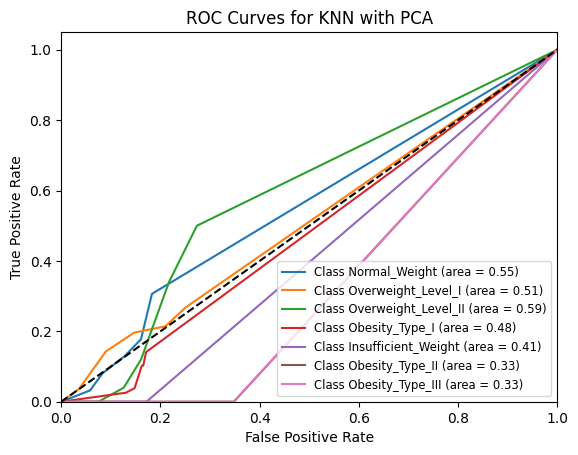

In [139]:
# KNN Model Training with PCA
knn_model_pca = KNeighborsClassifier()
knn_model_pca.fit(X_train_pca, y_train)
y_pred_pca_knn = knn_model_pca.predict(X_test_pca)
y_proba_pca_knn = knn_model_pca.predict_proba(X_test_pca)

y_test_bin = y_bin[test_index]  # Binarized labels for testing

print("KNN Metrics with PCA:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_pca_knn):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_pca_knn, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_pca_knn, average="weighted"):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_pca_knn, average="weighted"):.4f}')

plot_roc_curve(y_test_bin, y_proba_pca_knn, 'KNN with PCA')

CLUSTERING AND REGRESSION

In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [143]:
# Elbow method to find the optimal number of clusters
def elbow_method(X, title='Elbow Method for Optimal k'):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title(title)
    plt.show()


In [154]:
# Plot KMeans clusters
def plot_clusters(X, n_clusters, title='KMeans Clusters'):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    sil_score = silhouette_score(X_pca, y_kmeans)
    print(f'Silhouette Score: {sil_score:.4f}')

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
    plt.title(title)
    plt.show()


Elbow method for original data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

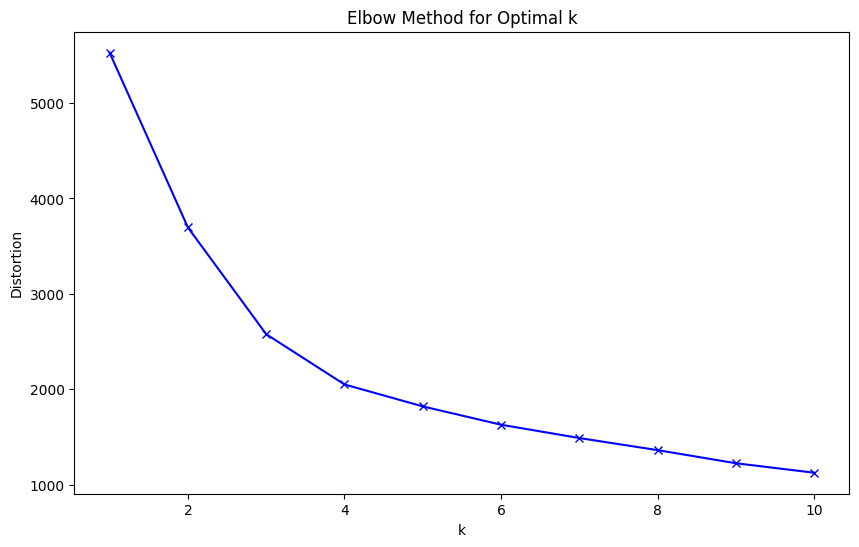

In [155]:
# Elbow method and clustering without PCA
print("Elbow method for original data")
elbow_method(X_selected)


KMeans Clustering without PCA


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.4643


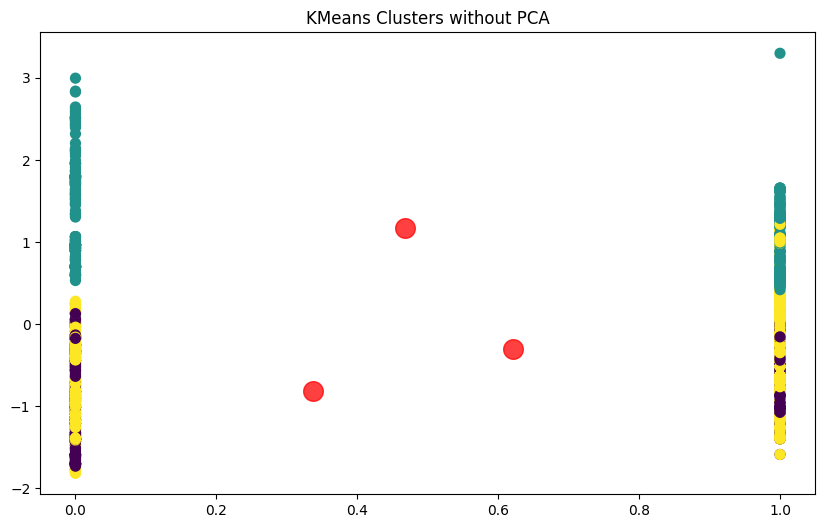

In [156]:
# Assuming we choose 3 clusters from the elbow method
print("KMeans Clustering without PCA")
plot_clusters(X_selected, n_clusters=3, title='KMeans Clusters without PCA')


Elbow method for PCA data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

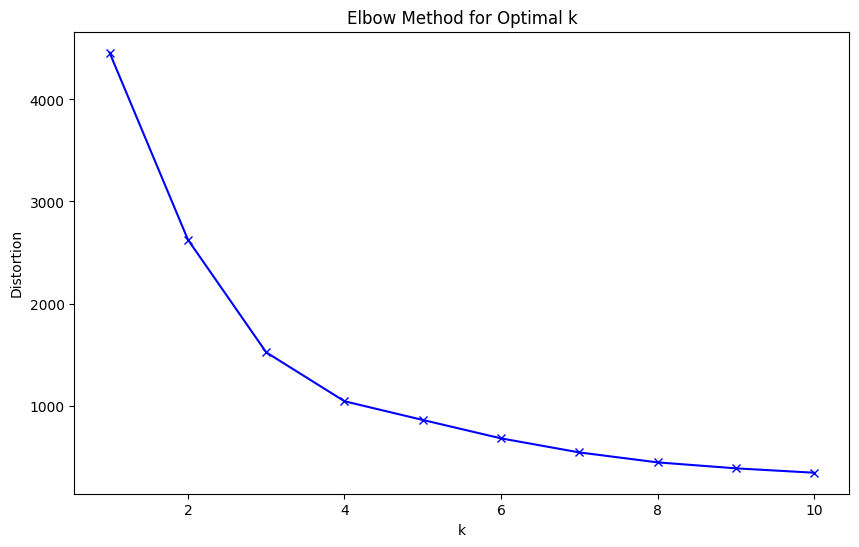

In [157]:
# Elbow method and clustering with PCA
print("Elbow method for PCA data")
elbow_method(X_pca)


KMeans Clustering with PCA
Silhouette Score: 0.4645


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


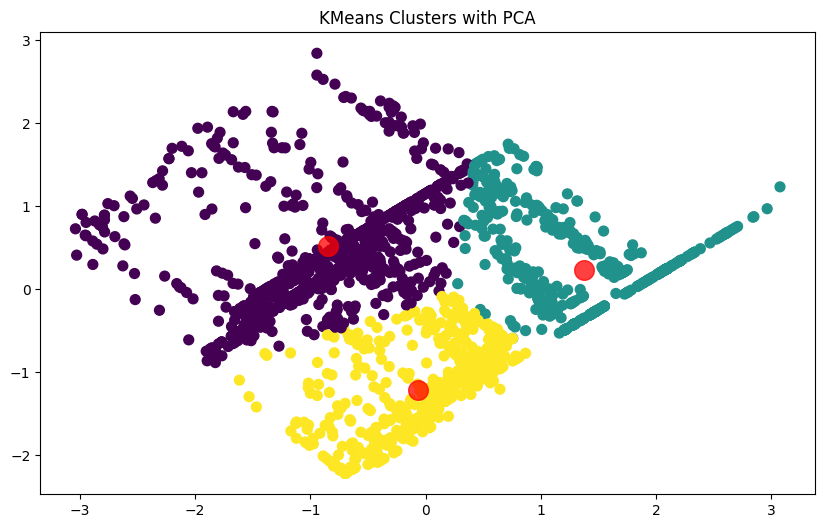

In [158]:
# Assuming we choose 3 clusters from the elbow method
print("KMeans Clustering with PCA")
plot_clusters(X_pca, n_clusters=3, title='KMeans Clusters with PCA')



LINEAR REGRESSION

In [ ]:
'''from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold

# Assuming we have another numerical column 'target_num' for linear regression
target_num = 'target_num'
X = data.drop(columns=[target_num])
y = data[target_num]

# Apply the same preprocessing to the data
X_transformed = preprocessor.fit_transform(X)
X_selected = selector.fit_transform(X_transformed, y)

# PCA transformation
X_pca = pca.fit_transform(X_selected)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Linear regression without PCA
lr_model = LinearRegression()

# Without PCA
print("Linear Regression Metrics Without PCA:")
for train_index, test_index in kf.split(X_selected):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lr_model.fit(X_train, y_train)
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)

    print(f'Train RMSE: {mean_squared_error(y_train, y_pred_train, squared=False):.4f}')
    print(f'Test RMSE: {mean_squared_error(y_test, y_pred_test, squared=False):.4f}')
    print(f'Train MAE: {mean_absolute_error(y_train, y_pred_train):.4f}')
    print(f'Test MAE: {mean_absolute_error(y_test, y_pred_test):.4f}')
    print(f'Train R2: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Test R2: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Train Accuracy: {lr_model.score(X_train, y_train):.4f}')
    print(f'Test Accuracy: {lr_model.score(X_test, y_test):.4f}')
    print()

# Linear regression with PCA
lr_model_pca = LinearRegression()

# With PCA
print("Linear Regression Metrics With PCA:")
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lr_model_pca.fit(X_train, y_train)
    y_pred_train = lr_model_pca.predict(X_train)
    y_pred_test = lr_model_pca.predict(X_test)

    print(f'Train RMSE: {mean_squared_error(y_train, y_pred_train, squared=False):.4f}')
    print(f'Test RMSE: {mean_squared_error(y_test, y_pred_test, squared=False):.4f}')
    print(f'Train MAE: {mean_absolute_error(y_train, y_pred_train):.4f}')
    print(f'Test MAE: {mean_absolute_error(y_test, y_pred_test):.4f}')
    print(f'Train R2: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Test R2: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Train Accuracy: {lr_model_pca.score(X_train, y_train):.4f}')
    print(f'Test Accuracy: {lr_model_pca.score(X_test, y_test):.4f}')
    print() '''
